Import stuff

In [145]:
import pandas as pd
import numpy as np
from pyproj import Proj, transform
import matplotlib.pyplot as plt
import datetime

Read from the csv and rename the specific columns

In [8]:
file = 'np_data.csv'
df = pd.read_csv(file, sep = ",", usecols = ['CounterID_ASTA', 'StartTime', 'EndTime', 'Visits', 'ASTA_Counters.NationalParkCode', 'PAVE_Counters.CoordinateNorth', 'PAVE_Counters.CoordinateEast'])
df.columns = ['id', 'start', 'end', 'visits', 'np_code', 'loc_north', 'loc_east']
df = df.drop(df[df.np_code == 34361].index)
df['start'] = pd.to_datetime(df['start'])
df['end']  = pd.to_datetime(df['end'])
df = df.drop(df[df.end < '1/10/2018 00:00'].index)
df['duration'] = df.apply(lambda row: row.end-row.start, axis=1)
df = df.drop(df[df.duration > '01:00:00'].index)

In [92]:
df2 = df
df2
df2 = df2.drop(['end', 'np_code', 'loc_north', 'loc_east', 'duration'], axis=1)
hour = df2.iloc[[44]]['start'].dt.hour
#df2.to_numpy()

In [99]:
ids = df2['id'].unique()
for i in range(len(ids)):
    df2 = df2.replace(ids[i],i)

In [100]:
df2

,id,start,visits
212219,0,2018-02-01 00:00:00,0
212220,0,2018-02-01 01:00:00,0
212221,0,2018-02-01 02:00:00,0
212222,0,2018-02-01 03:00:00,0
212223,0,2018-02-01 04:00:00,0
...,...,...,...
508769,4,2019-03-10 19:00:00,3
508770,4,2019-04-10 07:00:00,3
508771,4,2019-04-10 14:00:00,3
508772,4,2019-06-10 09:00:00,3


In [133]:
df3 = df2.to_numpy()
print(df3.shape)

(82640, 3)


In [134]:
hours = np.zeros((len(df2['id'].unique()), 24))
months = np.zeros((len(df2['id'].unique()), 12))
days = np.zeros((len(df2['id'].unique()), 7))

In [154]:
for i in range(df3.shape[0]):
    hours[df3[i,0], df3[i,1].hour] += df3[i,2]
    months[df3[i,0], df3[i,1].month-1] += df3[i,2]
    days[df3[i,0], df3[i,1].weekday()] += df3[i,2]
hours

array([[1.6000e+02, 0.0000e+00, 2.4000e+01, 2.8000e+01, 3.6000e+01,
        5.2000e+01, 2.3200e+02, 7.0000e+02, 9.9200e+02, 3.0960e+03,
        8.7040e+03, 1.7688e+04, 2.2748e+04, 2.6084e+04, 2.5168e+04,
        2.1500e+04, 1.7396e+04, 1.1460e+04, 7.9400e+03, 4.9960e+03,
        2.8480e+03, 1.3880e+03, 3.9200e+02, 1.2800e+02],
       [4.4000e+01, 1.6000e+01, 4.0000e+00, 4.0000e+00, 8.0000e+00,
        6.8000e+01, 2.7600e+02, 4.1200e+02, 1.1240e+03, 2.0120e+03,
        4.0160e+03, 5.5400e+03, 6.3360e+03, 5.1160e+03, 5.9840e+03,
        5.0640e+03, 4.1960e+03, 4.4640e+03, 5.8880e+03, 5.0200e+03,
        3.2760e+03, 1.3360e+03, 4.3600e+02, 6.0000e+01],
       [2.0000e+01, 3.2000e+01, 4.0000e+00, 4.0000e+00, 2.8000e+01,
        5.6000e+01, 1.9200e+02, 2.2400e+02, 7.4800e+02, 1.5280e+03,
        3.1760e+03, 4.1720e+03, 3.8280e+03, 3.0880e+03, 2.6440e+03,
        2.3480e+03, 2.0600e+03, 1.9600e+03, 2.3600e+03, 1.7520e+03,
        1.2760e+03, 4.7600e+02, 8.8000e+01, 1.2000e+01],
       [1.600

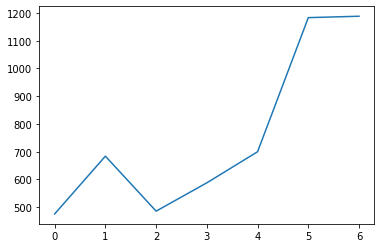

In [152]:
#print(hours)
plt.plot(days[5,:])

In [159]:
header = "0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23"
np.savetxt("counters_hours.csv", hours, delimiter=",", fmt='%s', header=header, comments='')
header = "monday, tuesday, wednesday, thursday, friday, saturday, sunday"
np.savetxt("counters_days.csv", days, delimiter=",", fmt='%s', header=header, comments='')
header = "january, february, march, april, may, june, july, august, september, october, november, december"
np.savetxt("counters_months.csv", months, delimiter=",", fmt='%s', header=header, comments='')

National park ids:
852 = Nuuksio National Park
34361 = Pallas-Yllästunturi National Park
Drop the P-Y National Park
Drop data before 1/10/2018
Drop data witch is more than an hour